<a href="https://colab.research.google.com/github/Annie2305/NTHU_ML_and_STAT/blob/main/112031508_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

Read data

In [ ]:
df = pd.read_csv('/content/training_set.csv')
df.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0


# Exploratory Data Analysis (EDA)

In [ ]:
df.shape
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
HAEMATOCRIT,0
HAEMOGLOBINS,0
ERYTHROCYTE,0
LEUCOCYTE,0
THROMBOCYTE,0
MCH,0
MCHC,0
MCV,0
AGE,0
SEX,0


In [ ]:
df['SEX'] = df['SEX'].map({'F': 0, 'M': 1})

Correlation Heatmap

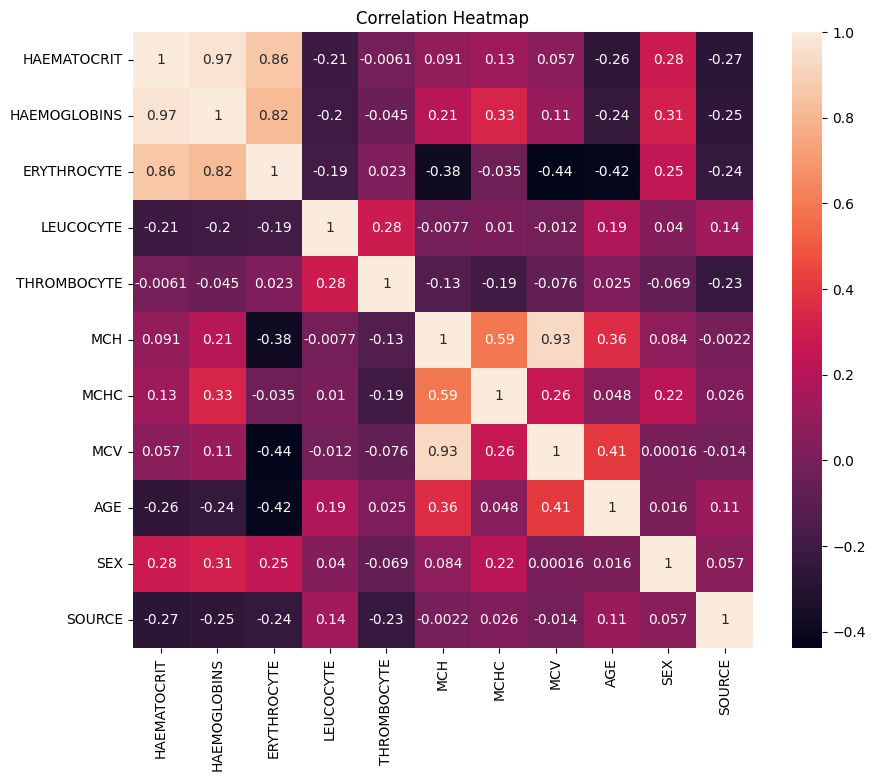

In [ ]:

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

Histograms of Features

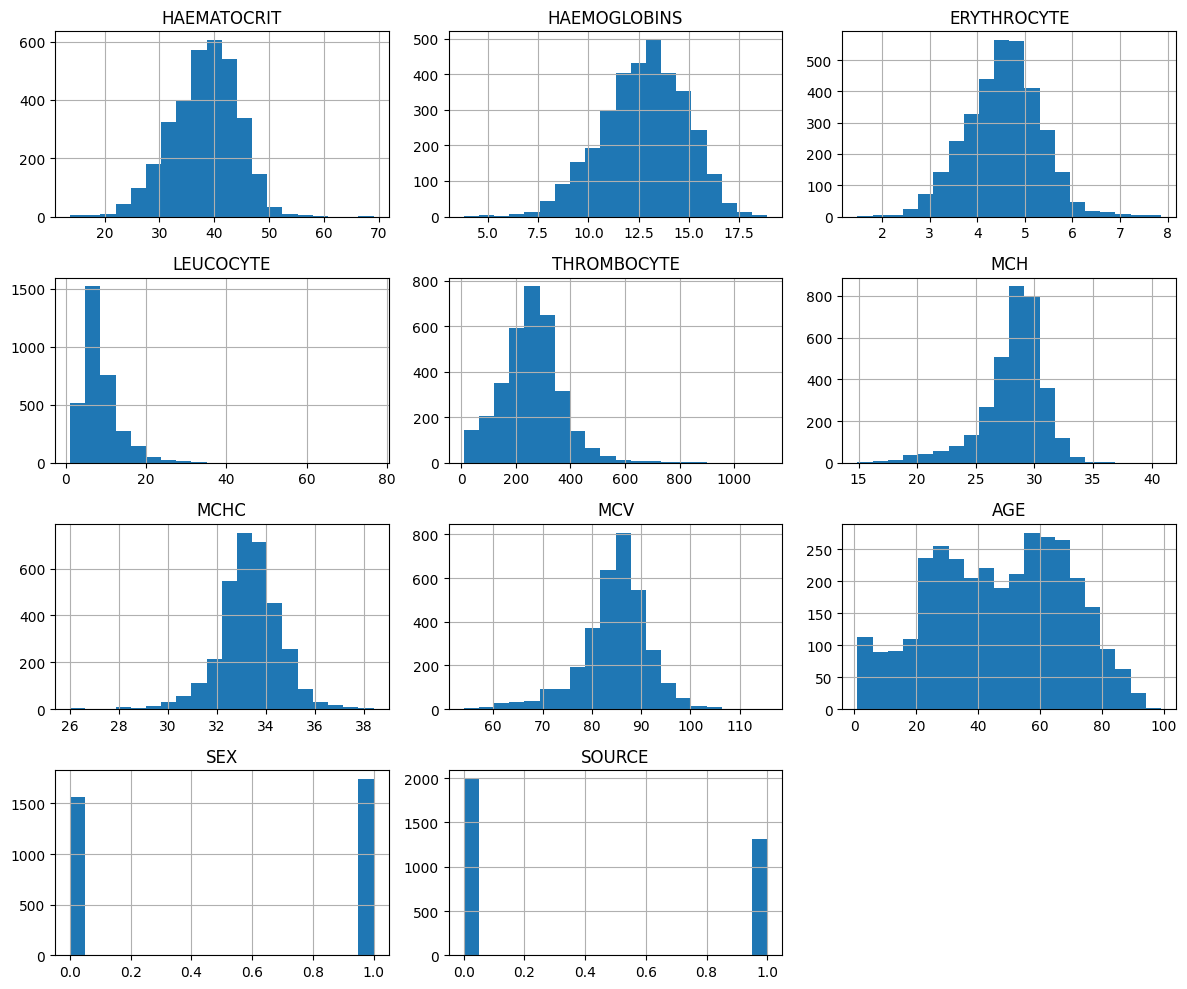

In [ ]:
df.hist(figsize = (12, 10), bins = 20)
plt.tight_layout()
plt.show()

# Naive Bayes

In [ ]:
X = df.drop('SOURCE', axis = 1)
y = df['SOURCE']

X = pd.get_dummies(X, columns = ['SEX'], drop_first=True)


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_val_idx, test_idx) in enumerate(kf.split(X)):

  X_train_val, X_test = X.iloc[train_val_idx], X.iloc[test_idx]
  y_train_val, y_test = y.iloc[train_val_idx], y.iloc[test_idx]

  X_train_val, X_test, y_train_val, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

  X_train, X_val, y_train, y_val = train_test_split(
      X_train_val, y_train_val, test_size=0.125, random_state=42)

  model = GaussianNB()
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(f"Fold {fold + 1}:")
  print(classification_report(y_test, y_pred))

Fold 1:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       392
           1       0.65      0.49      0.56       270

    accuracy                           0.68       662
   macro avg       0.67      0.65      0.65       662
weighted avg       0.68      0.68      0.67       662

Fold 2:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       392
           1       0.65      0.49      0.56       270

    accuracy                           0.68       662
   macro avg       0.67      0.65      0.65       662
weighted avg       0.68      0.68      0.67       662

Fold 3:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       392
           1       0.65      0.49      0.56       270

    accuracy                           0.68       662
   macro avg       0.67      0.65      0.65       662
weighted avg       0.68      0.68      0.67       

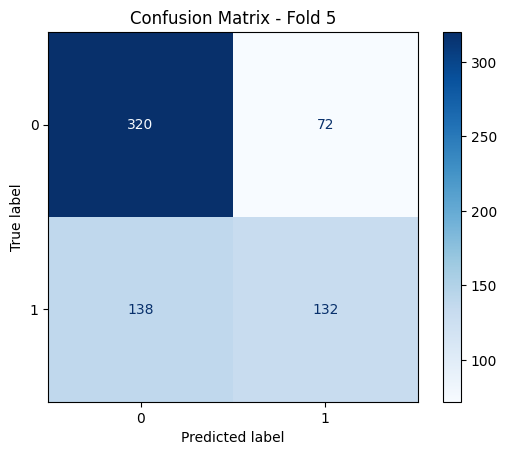

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# After predicting
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# Create and show confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Fold {fold + 1}")
plt.show()


# Performance Report

It looks like the model didn't perform well on classifying class 1, since precision and recall are lower than class 0.



1.   **Class Imbalnace** :
In this dataset, we can see that it has more class 0 samples(392) than class 1 samples (270), which may be contributing to the classification bias.
2.   **Metrics Interpretation:**

*   The higher precision for class 0 (0.70) shows that when the model predicts class 0, it gets 70% correct of the time.
*   The high recall for class 0 (0.82) shows that the model successfully indentifies 82% of all actual class 0.
*   The low recall for class 1 (0.49), however, indicating that the model only captures half of the actual class 1 sample.

3.   **Feature Independence Assumption:**
Naive Bayes assumes all features are indepent of each other. However, features are often correlated in medical datasets (like this one). This may reduce the effectiveness of the model. There may be more complex interaction patterns in class 1 that Naive Bayes cannot capture.






